# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output

import torch
from torch import nn

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

sns.set(font_scale=1.2, palette="Set2")
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**
...

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1),
)

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [ ]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.arctan(X).flatten()
assert y.shape == (sample_size,)

Обучите нейросеть на этих данных. Используйте код с занятия.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def show_progress(X, y, y_pred, loss):
    y_pred = y_pred.detach()

    loss = loss.item()

    clear_output(wait=True)

    plt.figure(figsize=(10, 7))

    plt.scatter(X, y, alpha=0.75)
    plt.scatter(X, y_pred, color="orange", linewidth=5)
    plt.legend()
    plt.show()

    print(f"MSE = {loss:.3f}")

In [ ]:
X_train_reshaped = torch.FloatTensor(X_train.reshape(-1, 1))
y_train_reshaped = torch.FloatTensor(y_train.reshape(-1, 1))
X_test_reshaped = torch.FloatTensor(X_test.reshape(-1, 1))
y_test_reshaped = torch.FloatTensor(y_test.reshape(-1, 1))

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
optim_func = nn.MSELoss()

In [ ]:
num_iter = 1000

for i in range(num_iter):
    y_pred = model(X_train_reshaped)
    loss = optim_func(y_pred, y_train_reshaped)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i + 1) % 100 == 0:
        if loss.item() < 0.005:
            print("Готово!")
            break

Готово!


Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

In [ ]:
y_pred = model(X_test_reshaped)

loss = optim_func(y_pred, y_test_reshaped)

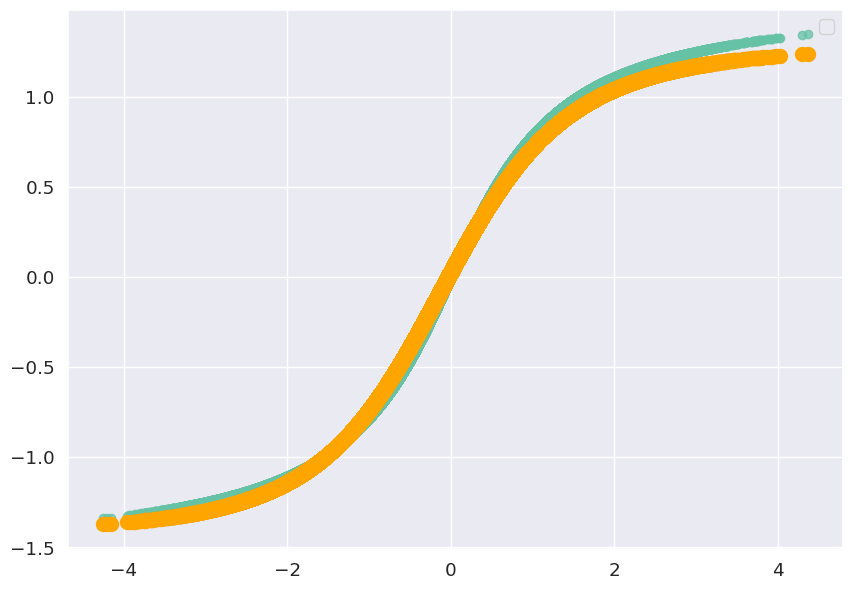

MSE = 0.003


In [ ]:
show_progress(X_test_reshaped, y_test_reshaped, y_pred, loss)

**Вывод:**
Можем видеть, что даже простые и быстро обучающиеся модели могут с хорошей точностью приближать достаточно простые, но тем не менее нелинейные функции.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

Документация к написанным методам класса NN:

* __init__ : parameters:
 * self
 * iterations -- int, default value -- 10000
 * learning_rate -- double, default 0.1
 * batch_size -- int, default 512
 * batch_learning -- bool, default True

* fit : trains your model, returning value -- None. Parameters:
 * self
 * X -- features, array-like
 * Y -- target, array-like

* predict : returning value -- array-like predicted target. Parameters:
 * self
 * X -- features, array-like


In [ ]:
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
class NN:
    def __init__(
        self,
        iterations=10000,
        learning_rate=0.1,
        batch_size=512,
        batch_learning=True,
    ):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.batch_learning = batch_learning

        self.b11 = np.random.random()
        self.b12 = np.random.random()
        self.b2 = np.random.random()

        self.u1 = np.ndarray(1)
        self.u2 = np.ndarray(1)

        self.w11 = np.ndarray(1)
        self.w12 = np.ndarray(1)
        self.w21 = np.ndarray(1)
        self.w22 = np.ndarray(1)

    def fit(self, X, y):
        for i in range(self.iterations):

            if self.batch_learning:
                sz = (len(X) + self.batch_size - 1) // self.batch_size

                rand_ids = np.arange(0, len(X))
                np.random.shuffle(rand_ids)

                X_array = []
                y_array = []

                for i in range(0, sz):
                    X_array.append(
                        X[
                            rand_ids[
                                (i * len(X)) // sz : ((i + 1) * len(X)) // sz
                            ]
                        ]
                    )
                    y_array.append(
                        y[
                            rand_ids[
                                (i * len(y)) // sz : ((i + 1) * len(y)) // sz
                            ]
                        ]
                    )

            else:
                X_array = [X]
                y_array = [y]

            for j in range(len(X_array)):
                X_batch = X_array[j]
                y_batch = y_array[j]
                y_pred = self.predict(X_batch)

                grad_w12 = 2 * np.mean(
                    (y_pred - y_batch)
                    * self.w22
                    * self.u2
                    * (1 - self.u2)
                    * X_batch
                )
                grad_w11 = 2 * np.mean(
                    (y_pred - y_batch)
                    * self.w21
                    * self.u1
                    * (1 - self.u1)
                    * X_batch
                )
                grad_b12 = 2 * np.mean(
                    (y_pred - y_batch) * self.w22 * self.u2 * (1 - self.u2)
                )
                grad_b11 = 2 * np.mean(
                    (y_pred - y_batch) * self.w21 * self.u1 * (1 - self.u1)
                )

                grad_w21 = 2 * np.mean((y_pred - y_batch) * self.u1)
                grad_w22 = 2 * np.mean((y_pred - y_batch) * self.u2)
                grad_b2 = 2 * np.mean(y_pred - y_batch)

                self.w21 -= self.learning_rate * grad_w21
                self.w22 -= self.learning_rate * grad_w22
                self.b2 -= self.learning_rate * grad_b2

                self.w11 -= self.learning_rate * grad_w11
                self.w12 -= self.learning_rate * grad_w12
                self.b11 -= self.learning_rate * grad_b11
                self.b12 -= self.learning_rate * grad_b12

    def predict(self, X):
        self.u1 = sigmoid_activation((X @ self.w11) + self.b11)
        self.u2 = sigmoid_activation((X @ self.w12) + self.b12)
        y_pred = self.u1 * self.w21 + self.u2 * self.w22 + self.b2
        return y_pred

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

In [ ]:
custom_model = NN()
custom_model.fit(X_train, y_train)
y_pred = custom_model.predict(X_test)

Существенную проблему при обучении составляет затухание градиентов. Из-за этого веса в первом слое изменяются очень медленно.

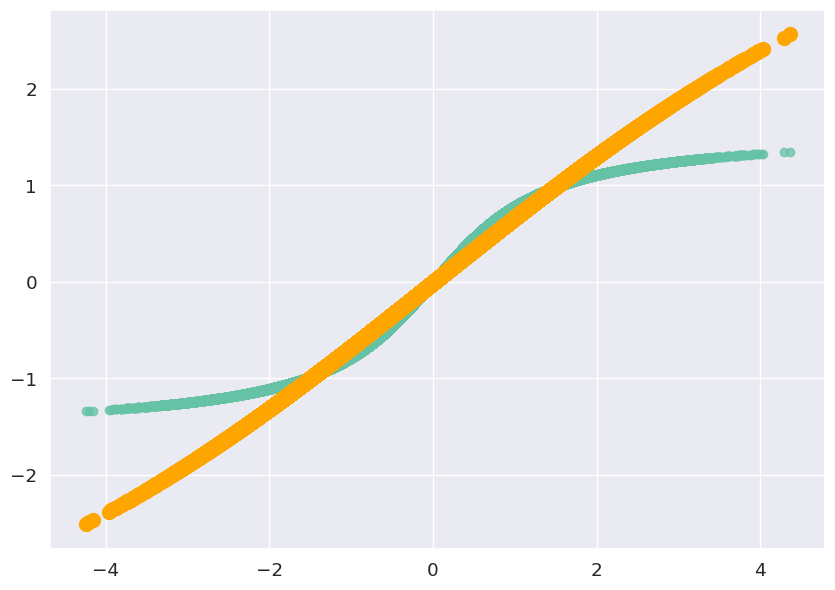

MSE: 0.017


In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, alpha=0.75)
plt.scatter(X_test, y_pred, color="orange", linewidth=5)
plt.show()
print(f"MSE: {np.mean((y_pred - y_test) ** 2):.3f}")

# Теперь протестируем линейную регрессию из sklearn

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

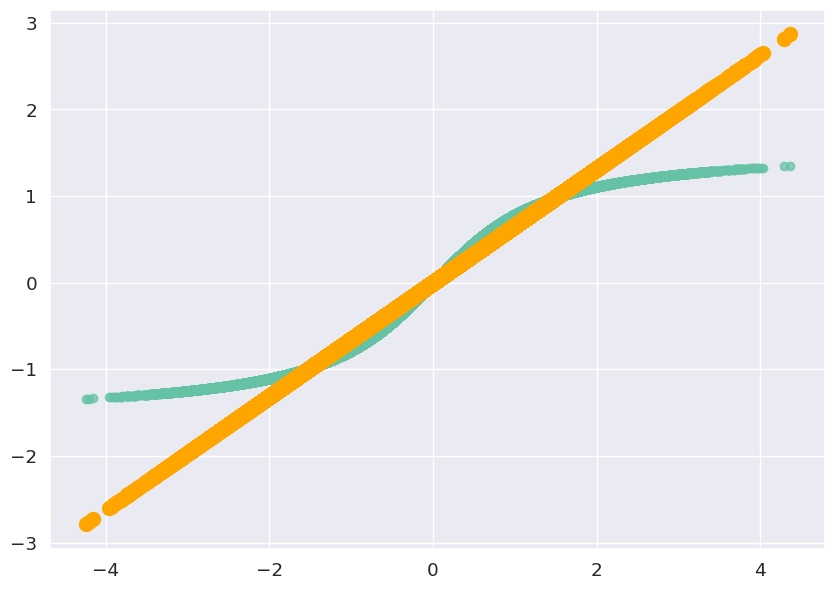

MSE: 0.020


In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, alpha=0.75)
plt.scatter(X_test, y_pred, color="orange", linewidth=5)
plt.show()
print(f"MSE: {np.mean((y_pred - y_test) ** 2):.3f}")

* Видим, что линейная регрессия хорошо приближает только линейную часть арктангенса.
* Наша модель работает чуть хуже модели из pytorch, однако однозначно лучше линейной регрессии.

Повторите вычисления для другой нелинейной функции $y(x)$.

In [ ]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.exp2(X).flatten()
assert y.shape == (sample_size,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train_reshaped = torch.FloatTensor(X_train.reshape(-1, 1))
y_train_reshaped = torch.FloatTensor(y_train.reshape(-1, 1))
X_test_reshaped = torch.FloatTensor(X_test.reshape(-1, 1))
y_test_reshaped = torch.FloatTensor(y_test.reshape(-1, 1))

In [ ]:
num_iter = 1000

for i in range(num_iter):
    y_pred = model(X_train_reshaped)
    loss = optim_func(y_pred, y_train_reshaped)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i + 1) % 100 == 0:
        if loss.item() < 0.005:
            print("Готово!")
            break

In [ ]:
y_pred = model(X_test_reshaped)

loss = optim_func(y_pred, y_test_reshaped)

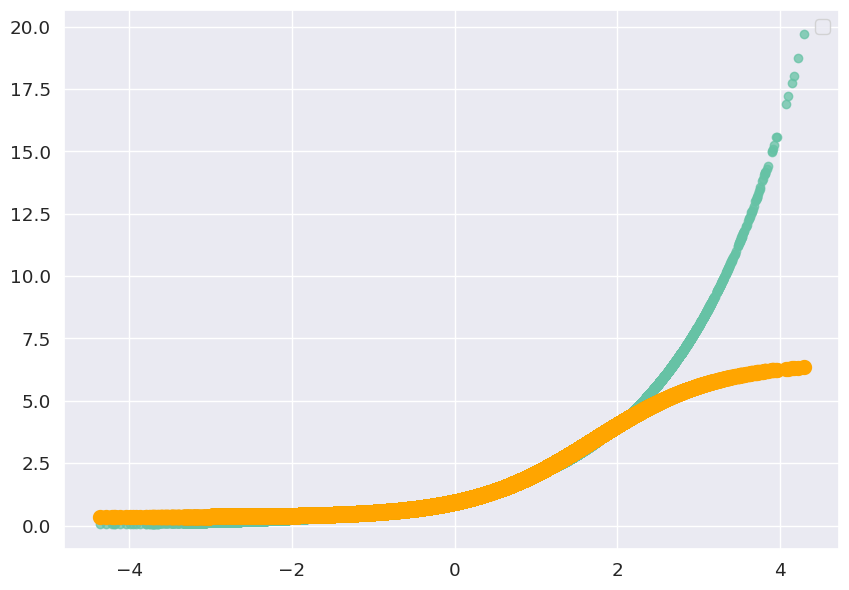

MSE = 0.045


In [ ]:
show_progress(X_test_reshaped, y_test_reshaped, y_pred, loss)

In [ ]:
custom_model = NN()
custom_model.fit(X_train, y_train)
y_pred = custom_model.predict(X_test)

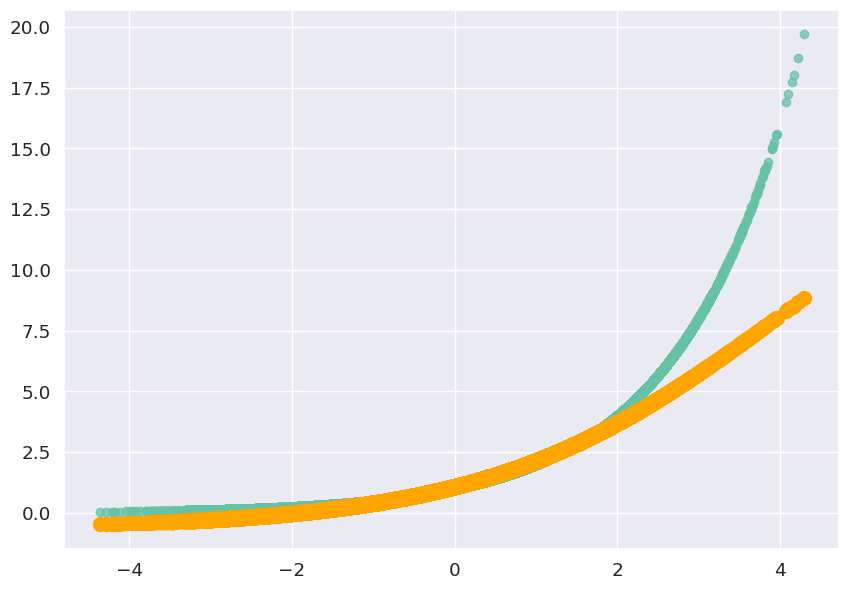

MSE: 0.052


In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, alpha=0.75)
plt.scatter(X_test, y_pred, color="orange", linewidth=5)
plt.show()
print(f"MSE: {np.mean((y_pred - y_test) ** 2):.3f}")

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

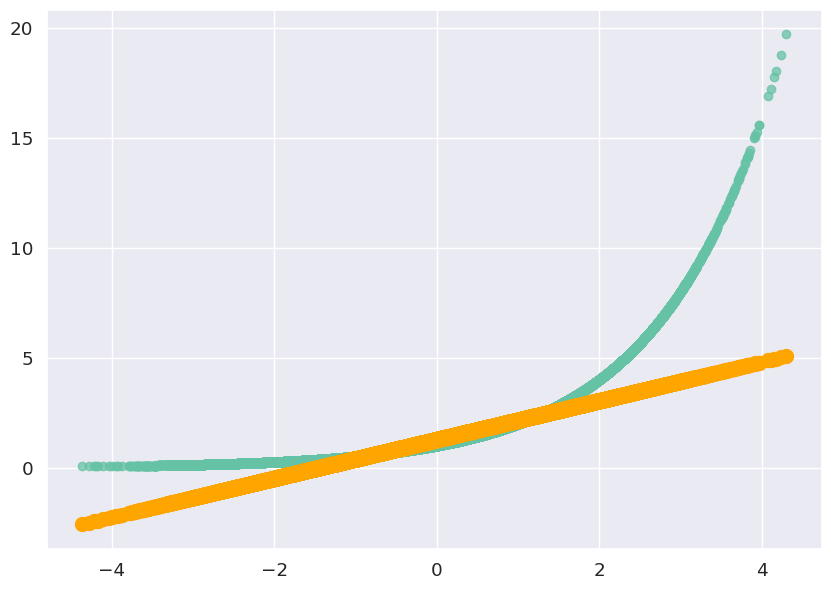

MSE: 0.222


In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, alpha=0.75)
plt.scatter(X_test, y_pred, color="orange", linewidth=5)
plt.show()
print(f"MSE: {np.mean((y_pred - y_test) ** 2):.3f}")

In [ ]:
names = ["torch model", "linear regression", "custom model"]
pred_arr = [
    model(X_test_reshaped).detach(),
    lin_reg.predict(X_test),
    custom_model.predict(X_test),
]

In [ ]:
def show_progress_for_many_models(X, y, y_pred, names):

    clear_output(wait=True)

    plt.figure(figsize=(10, 7))
    colors = ["orange", "green", "red"]
    plt.scatter(X, y, label="true value", alpha=0.75)
    for i in range(3):
        plt.scatter(X, y_pred[i], color=colors[i], label=names[i], linewidth=5)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Predictions for many models")
    plt.legend()
    plt.show()

Graphics for three models

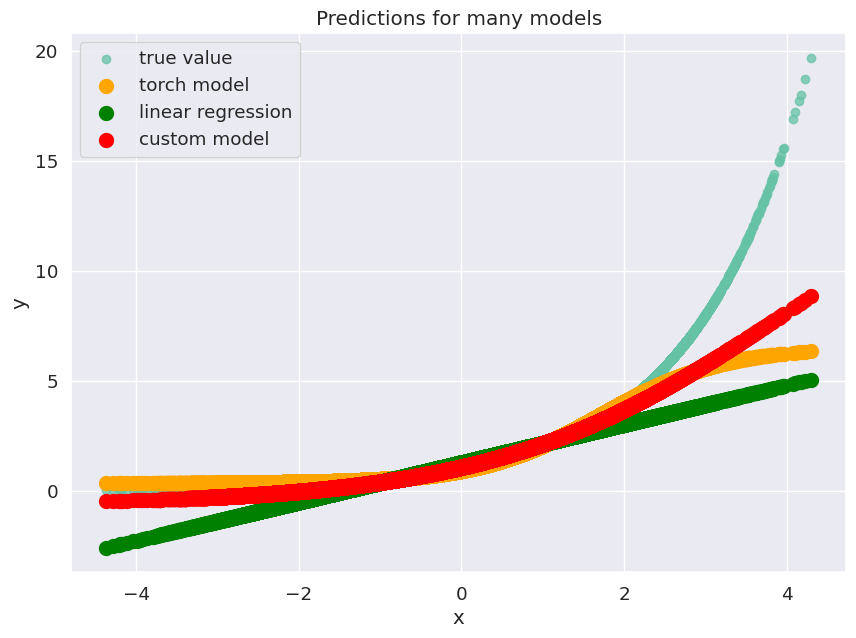

In [ ]:
show_progress_for_many_models(X_test, y_test, pred_arr, names)

**Вывод:**
* Можно видеть, что наша собственная нейросеть работает чуть лучше встроенной из py.torch, вероятно в силу большего количества нейронов.
* Нейросети неплохо справляются с предсказанием нелинейных зависимостей (за счёт нелинейных функций активации)
* Линейные модели, например, линейная регрессия, с нелинейными зависимостями не справляются
* Чем сложнее зависимость, тем больше слоёв и нейронов должно быть у нейросети для эффективного предсказания